In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv("G:\Projects\healthcare-stroke\healthcare-dataset-stroke-data.csv")

In [4]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
data['stroke'] = data['stroke'].astype(str)
data['stroke'].dtypes

dtype('O')

# declare feature vector and target variable

In [9]:
x = data.drop(['stroke'], axis =1)

y = data['stroke']

# split data into separate training and test set 

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state =42)

In [11]:
x_train.shape, x_test.shape

((3423, 11), (1687, 11))

# Feature Engineering

In [12]:
x_train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

# Encode categorial variables

In [13]:
import category_encoders as ce

In [14]:
encoder = ce.OrdinalEncoder(cols=['gender','ever_married','work_type','Residence_type','smoking_status','bmi'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)


In [15]:
x_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3378,62090,1,51.0,0,0,1,1,1,219.17,1,1
479,15649,1,54.0,1,0,2,2,1,198.69,2,2
3683,27647,1,80.0,0,1,2,1,1,95.49,3,3
2997,4498,1,71.0,0,1,2,2,2,204.98,2,4
286,36811,2,23.0,0,0,1,2,2,94.09,4,1


# Exploratory Data Analysis : -

# Gender

In [16]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

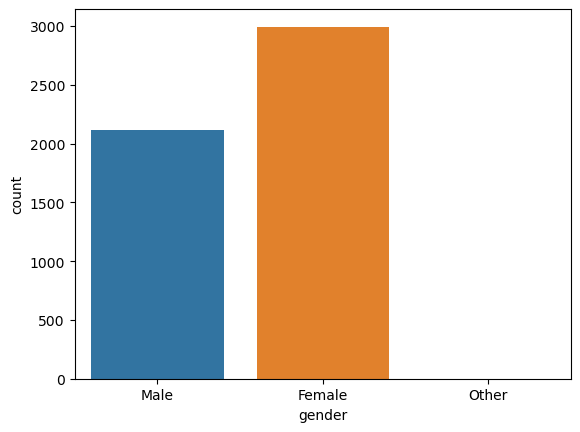

In [17]:
sns.countplot(data=data,x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

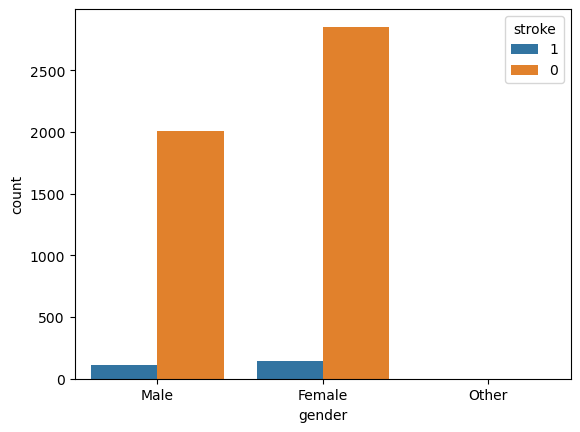

In [18]:
sns.countplot(data=data,x='gender',hue='stroke')

# Age

In [19]:
data['age'].nunique()

104

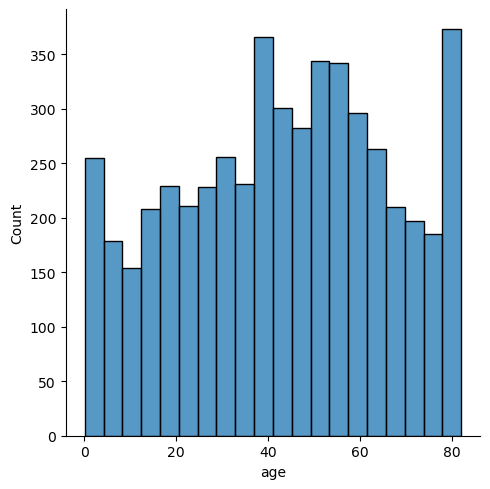

In [20]:
sns.displot(data['age'])

<AxesSubplot:xlabel='stroke', ylabel='age'>

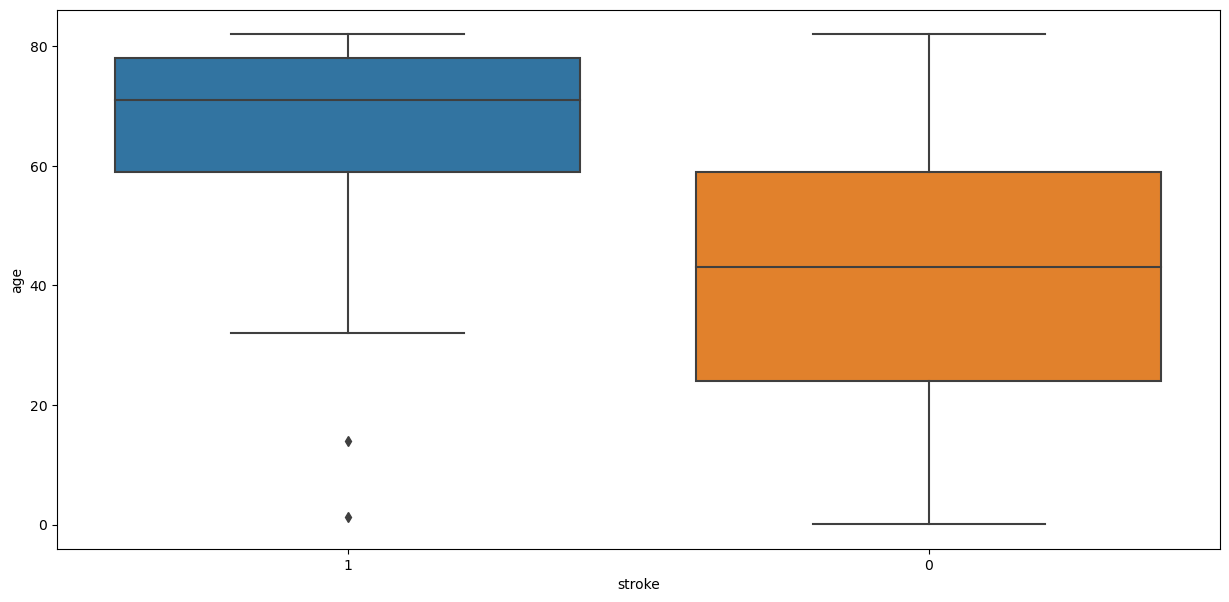

In [21]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')

# Hypertension

In [22]:
data['hypertension'].nunique()

2

<AxesSubplot:xlabel='hypertension', ylabel='count'>

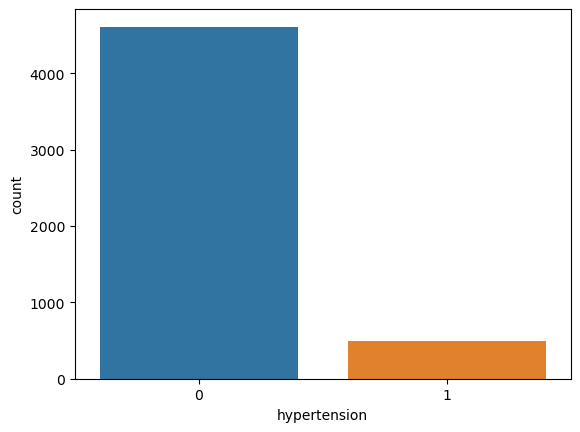

In [23]:
sns.countplot(data["hypertension"])

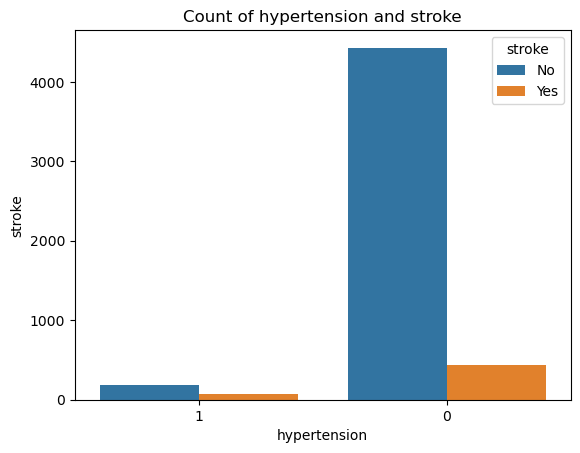

In [24]:
sns.countplot(x="stroke", hue="hypertension", data=data)
plt.title("Count of hypertension and stroke")
plt.xlabel("hypertension")
plt.ylabel("stroke")
plt.legend(title="stroke", labels=["No", "Yes"])
plt.show()

# Heart Disease

In [25]:
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

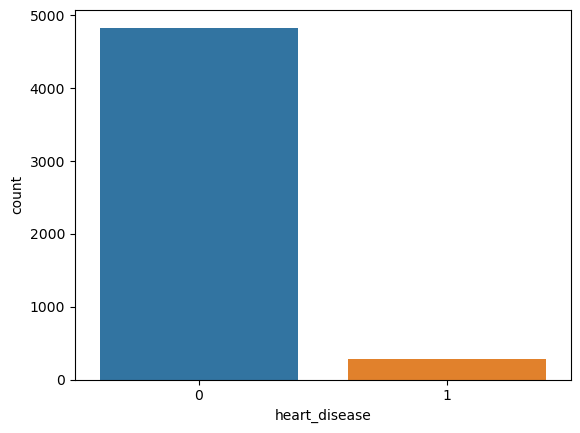

In [26]:
sns.countplot(data=data,x='heart_disease')

# Ever Married

In [27]:
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


<AxesSubplot:xlabel='ever_married', ylabel='count'>

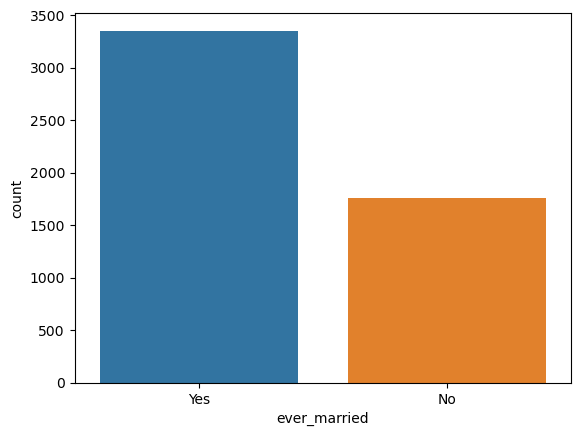

In [28]:
sns.countplot(data=data,x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

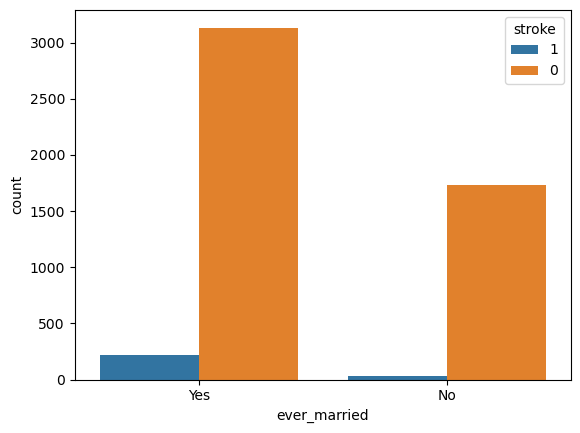

In [29]:
sns.countplot(data=data,x='ever_married',hue='stroke')

# Work Type

In [30]:
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<AxesSubplot:xlabel='work_type', ylabel='count'>

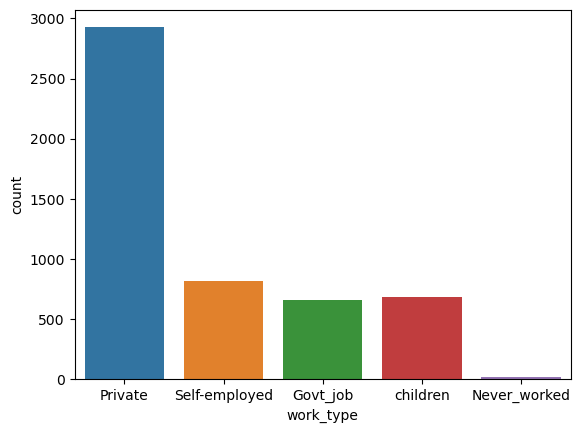

In [31]:
sns.countplot(data=data,x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

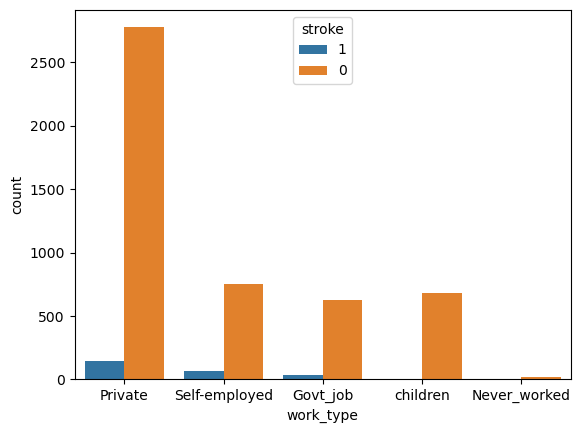

In [32]:
sns.countplot(data=data,x='work_type',hue='stroke')

# Residence Type

In [33]:
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

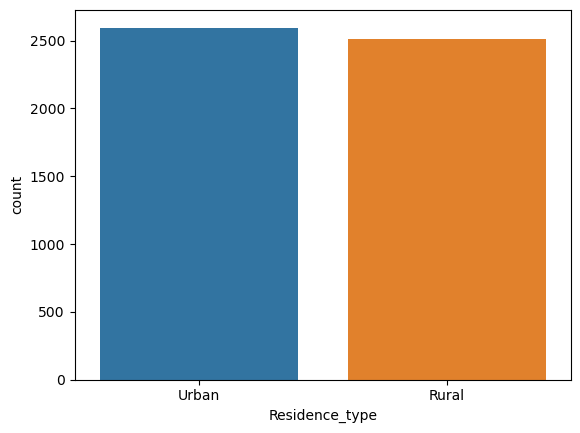

In [34]:
sns.countplot(data=data,x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

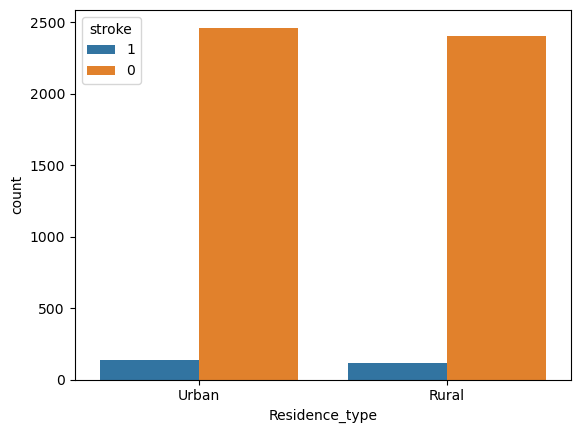

In [35]:
sns.countplot(data=data,x='Residence_type',hue='stroke')

# Average Glucose Level

In [36]:
data['avg_glucose_level'].nunique()

3979

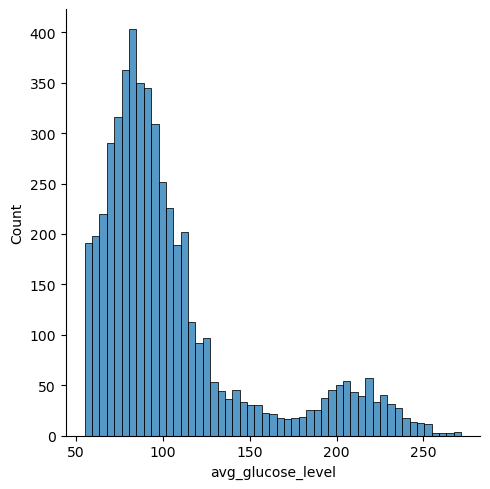

In [37]:
sns.displot(data['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

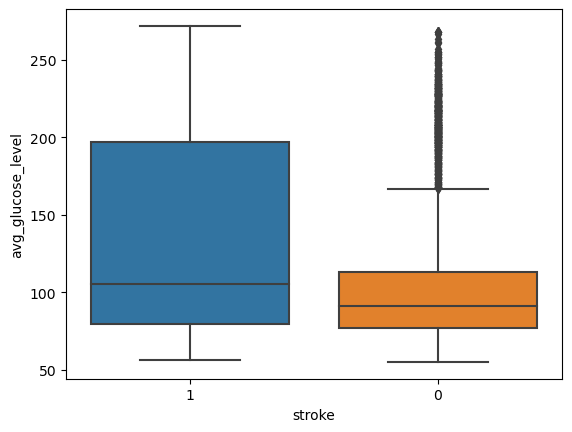

In [38]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')

# BMI

In [39]:
data['bmi'].isna().sum()

201

In [40]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [41]:
data['bmi'].nunique()

419

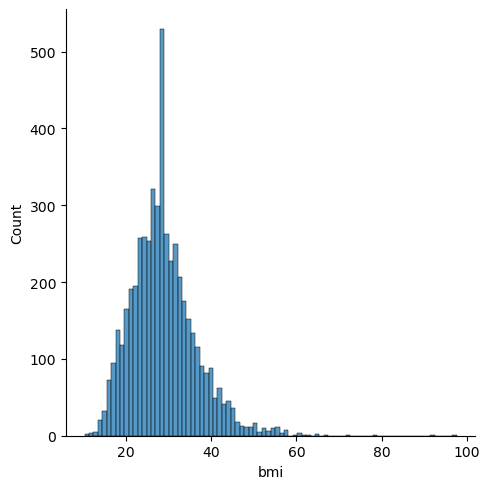

In [42]:
sns.displot(data['bmi'])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

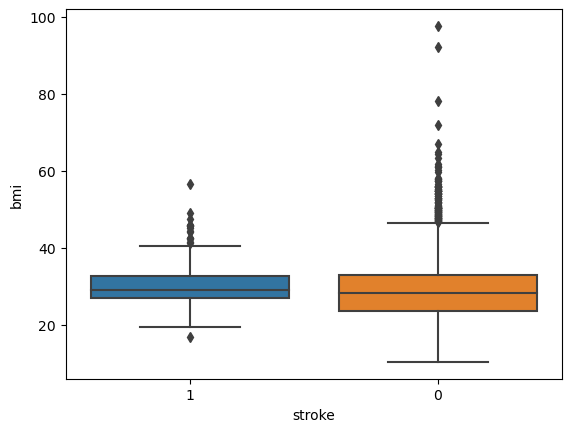

In [43]:
sns.boxplot(data=data,x='stroke',y='bmi')

# Smoking Status

In [44]:
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

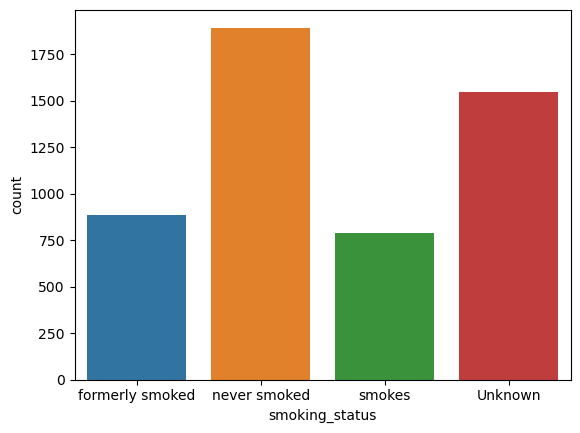

In [45]:
sns.countplot(data=data,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

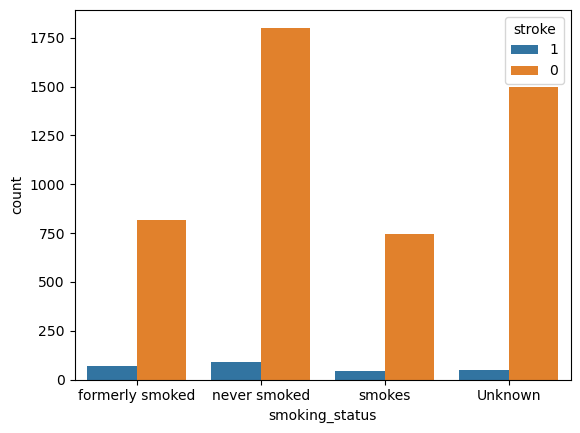

In [46]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

# Stroke

In [47]:
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())

Unique Value
 ['1' '0']
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

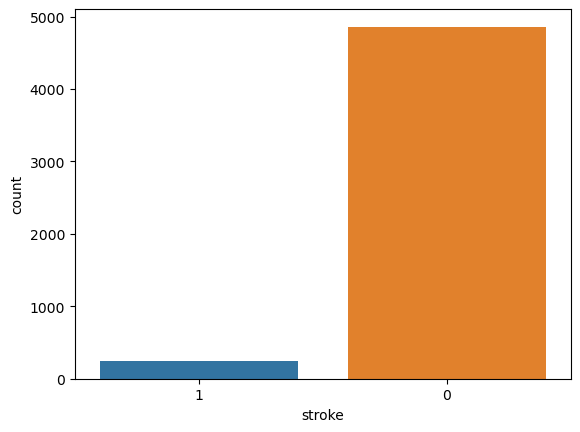

In [48]:
sns.countplot(data=data,x='stroke')

# ** How many people are at risk having stroke and not

In [49]:
# Count the number of people at risk of stroke
at_risk = len(data[(data['age'] > 50) | (data['hypertension'] == 1) | (data['heart_disease'] == 1) | (data['smoking_status'] == 'formerly smoked') | (data['smoking_status'] == 'currently smokes')])

not_at_risk = len(data) - at_risk

# Print the results
print(f"{at_risk} people are at risk of stroke.")
print(f"{not_at_risk} people are not at risk of stroke.")

2543 people are at risk of stroke.
2567 people are not at risk of stroke.


# ----------------------------------------------------------------------------------------------------------

# Correlation

<AxesSubplot:>

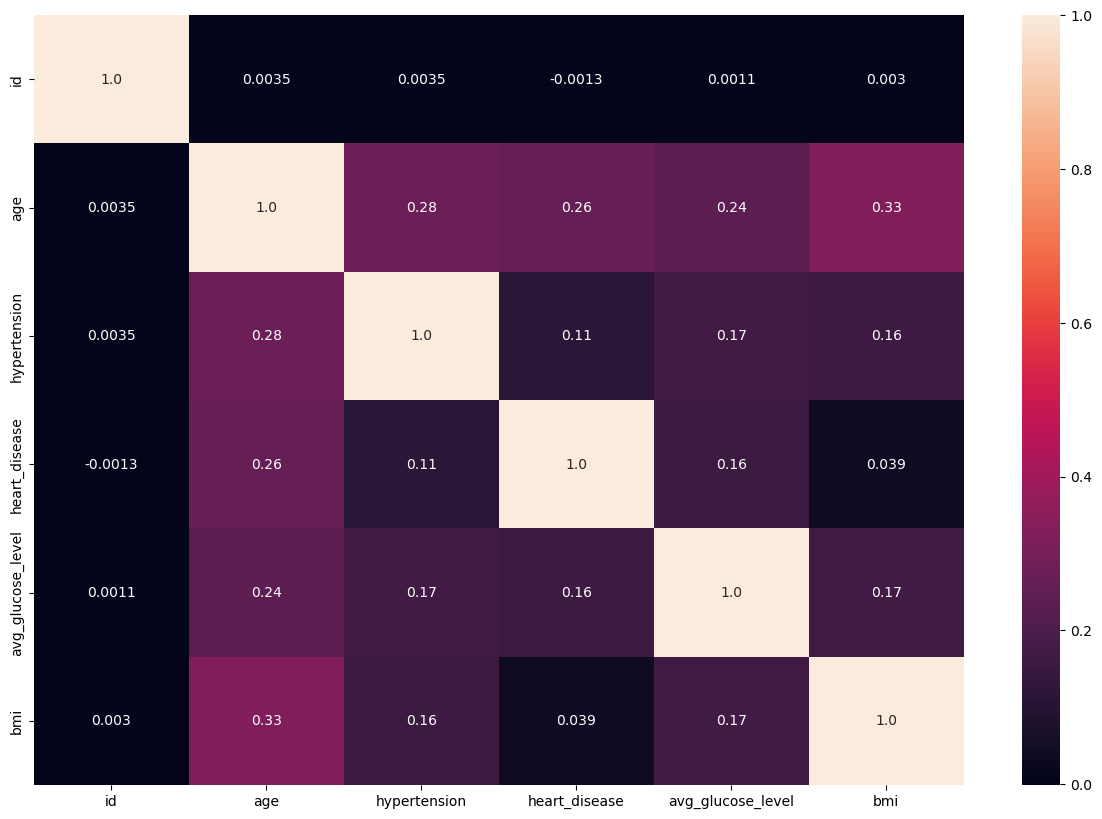

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [51]:
# Encode categorial variables(which i have done before)


encoder = ce.OrdinalEncoder(cols=['gender','ever_married','work_type','Residence_type','smoking_status','bmi'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)


In [52]:
x_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3378,62090,1,51.0,0,0,1,1,1,219.17,1,1
479,15649,1,54.0,1,0,2,2,1,198.69,2,2
3683,27647,1,80.0,0,1,2,1,1,95.49,3,3
2997,4498,1,71.0,0,1,2,2,2,204.98,2,4
286,36811,2,23.0,0,0,1,2,2,94.09,4,1


In [53]:
y_train.head()

3378    0
479     0
3683    0
2997    0
286     0
Name: stroke, dtype: object

# model building

In [54]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

# predict the test set results with criterion gini index

In [55]:
y_pred_gini = clf_gini.predict(x_test)

 # check accuracy score with criterion gini index

In [56]:
from sklearn.metrics import accuracy_score

print('Model accurecy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accurecy score with criterion gini index: 0.9378


# Compare the train-set and test-set accuracy

In [57]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9573
Test set score: 0.9378


# visualize decision-trees

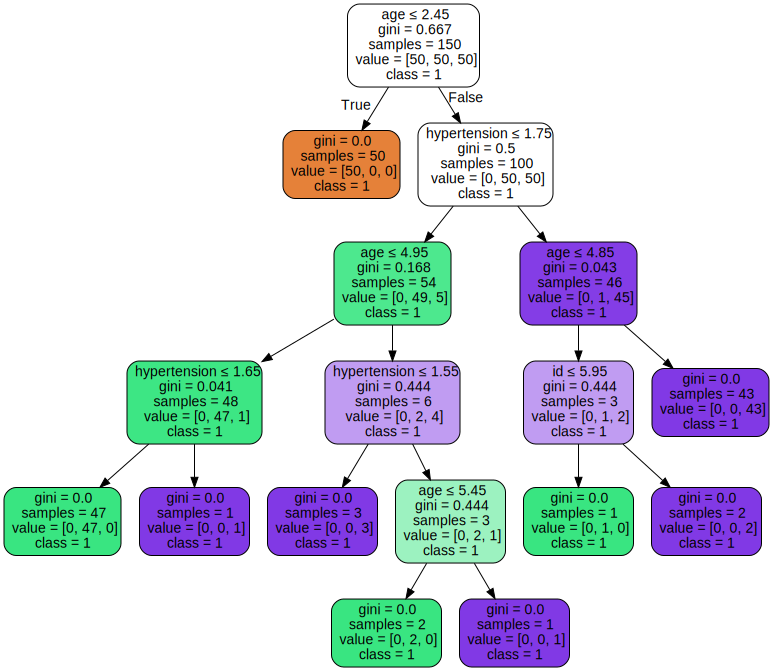

In [58]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Load iris dataset
iris = load_iris()

# Create decision tree classifier object
clf = DecisionTreeClassifier()

# Train the classifier using iris dataset
clf.fit(iris.data, iris.target)

dot_data = export_graphviz(clf, out_file=None, feature_names=x_train.columns[:4], class_names=y_train, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)


graph